In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('~/Downloads/CC General.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df = df.drop('CUST_ID', axis=1)
df.dropna(inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [4]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_normalized = normalize(df_scaled)
df_normalized = pd.DataFrame(df_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320
3,-0.156537,0.211587,-0.195017,-0.146385,-0.192092,-0.196202,-0.430561,-0.171033,-0.387886,-0.285498,-0.200715,-0.233329,-0.380097,-0.159155,-0.109322,-0.225118,0.148696
4,0.045686,0.231939,0.065195,-0.164825,0.456538,-0.215074,0.195195,-0.314946,0.247302,-0.312960,-0.220022,-0.128189,-0.341406,-0.060632,0.298463,-0.246772,0.162999


In [6]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df_normalized)
df_principal = pd.DataFrame(df_principal)
df_principal.columns = ['P1', 'P2']
df_principal.head()

,P1,P2
0,-0.481788,-0.692992
1,-0.537375,0.527803
2,0.320760,0.265227
3,-0.562994,-0.503868
4,0.320512,-0.254467


In [7]:
pca.explained_variance_ratio_

array([0.29255562, 0.18306542])

In [8]:
df_back = pca.inverse_transform(df_principal)[0]

In [9]:
scaler.inverse_transform(df_back)

array([9.68685717e+02, 8.67220411e-01, 5.17249522e+02, 2.87579866e+02,
       2.29995636e+02, 5.34388992e+02, 3.64612099e-01, 1.12213970e-01,
       2.66963386e-01, 9.16790401e-02, 1.91133078e+00, 7.82825122e+00,
       3.21984969e+03, 1.08506398e+03, 5.71622097e+02, 1.33946778e-01,
       1.16102208e+01])

In [10]:
df_normalized.iloc[0]

0    -0.311806
1    -0.154954
2    -0.179717
3    -0.150396
4    -0.148581
5    -0.196246
6    -0.343691
7    -0.287374
8    -0.300313
9    -0.285562
10   -0.200761
11   -0.216751
12   -0.403071
13   -0.227772
14   -0.127929
15   -0.225169
16    0.148729
Name: 0, dtype: float64

In [29]:
db_def = DBSCAN(eps=0.0375, min_samples=3).fit(df_principal)
labels = db_def.labels_

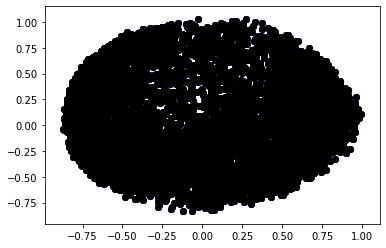

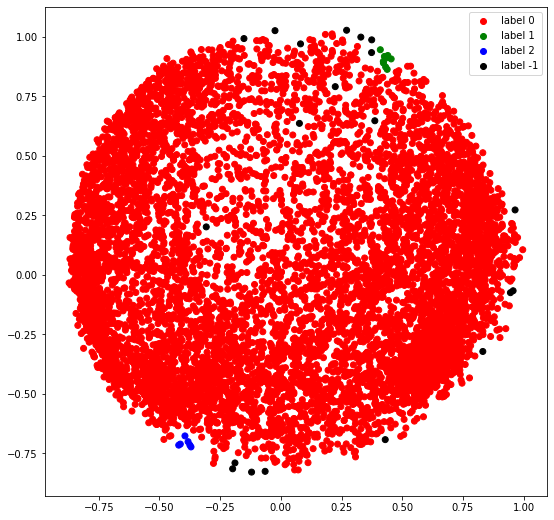

In [12]:
colours= {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(df_principal['P1'],df_principal['P2'],color = 'r')
g = plt.scatter(df_principal['P1'],df_principal['P2'],color = 'g')
b = plt.scatter(df_principal['P1'],df_principal['P2'],color = 'b')
k = plt.scatter(df_principal['P1'],df_principal['P2'],color = 'k')

plt.figure(figsize=(9,9))
plt.scatter(df_principal['P1'], df_principal['P2'], c=cvec)

plt.legend((r,g,b,k), ('label 0', 'label 1', 'label 2', 'label -1'))

plt.show()